In [3]:
# Imports
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import random

In [4]:
df_train = pd.read_csv('equip_failures_training_set.csv')
df_test = pd.read_csv('equip_failures_test_set.csv')

## Exploratory data analysis

Counting the values of the target to find out how skewed our data is

In [5]:
df_train.target.value_counts()

0    59000
1     1000
Name: target, dtype: int64

# Understanding the histograms

In [6]:
# analyzing one of the sensors:
hist_cols = [i for i in df_train.columns if 'sensor7_' in i]
hist_cols

['sensor7_histogram_bin0',
 'sensor7_histogram_bin1',
 'sensor7_histogram_bin2',
 'sensor7_histogram_bin3',
 'sensor7_histogram_bin4',
 'sensor7_histogram_bin5',
 'sensor7_histogram_bin6',
 'sensor7_histogram_bin7',
 'sensor7_histogram_bin8',
 'sensor7_histogram_bin9']

In [7]:
df_sen = df_train[hist_cols]

In [8]:
# df_sen

# Understanding the corrs

In [9]:
# # agger 0s
# for i in range(0, int(len(df_train[df_train.target==0])/10), 10):
#     print(df_train.loc[:10])

# Dropping the hists

In [10]:
# dropping all hists for now
# non_hist_cols_train = [i for i in df_train.columns if 'histogram' not in i]
# non_hist_cols_test = [i for i in df_test.columns if 'histogram' not in i]

# df_train = df_train[non_hist_cols_train]
# df_test = df_test[non_hist_cols_test]

In [11]:
# dealing with the datatypes
df_train = df_train.applymap(lambda x: np.nan if x == 'na' else float(x))
df_test = df_test.applymap(lambda x: np.nan if x == 'na' else float(x))

# Dealing with NaNs

In [12]:
# the number of rows and columns before dropping the nans:
print("TRAIN: ", "rows: ", len(df_train), "cols: ", len(df_train.columns))
print("TEST: ", "rows: ", len(df_test), "cols: ", len(df_test.columns))

TRAIN:  rows:  60000 cols:  172
TEST:  rows:  16001 cols:  171


### Finding out the dist. of nans throughout the dataset

In [13]:
nan_dist_train = {}
nan_dist_test = {}

for i in df_train.columns:    
    nan_dist_train[i] = df_train[i].isna().sum()
        
for i in df_test.columns:    
    nan_dist_test[i] = df_test[i].isna().sum()

### train

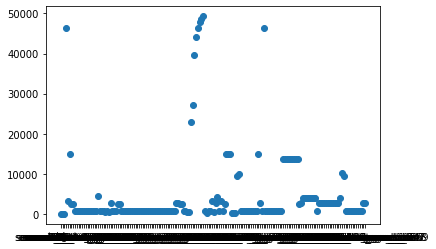

In [14]:
# plotting nan dist.
plt.scatter(range(len(nan_dist_train)), list(nan_dist_train.values()))
plt.xticks(range(len(nan_dist_train)), list(nan_dist_train.keys()))
plt.show()

### test

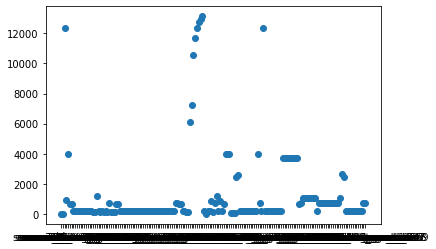

In [15]:
plt.scatter(range(len(nan_dist_test)), list(nan_dist_test.values()))
plt.xticks(range(len(nan_dist_test)), list(nan_dist_test.keys()))
plt.show()

### Finding the dist based on class:

### dropping nans

In [16]:
# drop the column if a percentage of the column (its rows) is na
# 2 percent
for i in df_train.columns:
    if df_train[i].isna().sum() > 0.06 * len(df_train):
        df_train.drop(i, axis=1, inplace=True)

In [17]:
# drop the column if a percentage of the column (its rows) is na
# 2 percent
for i in df_test.columns:
    if df_test[i].isna().sum() > 0.06 * len(df_test):
        df_test.drop(i, axis=1, inplace=True)

In [18]:
df_train.fillna(method='ffill', axis=1, inplace=True)
df_test.fillna(method='ffill', axis=1, inplace=True)

In [19]:
# the number of rows and columns after dropping the nans:
print("rows: ", len(df_train), "cols: ", len(df_train.columns))
print("rows: ", len(df_test), "cols: ", len(df_test.columns))

rows:  60000 cols:  133
rows:  16001 cols:  132


In [20]:
# See if there are any nans left:
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


### plotting the number of zeros vs non-zeros per column

In [21]:
zero_dist_train = {}
zero_dist_test = {}

for i in df_train.columns:
    if 0 in df_train[i].value_counts():    
        zero_dist_train[i] = df_train[i].value_counts()[0]
        
for i in df_test.columns:
    if 0 in df_train[i].value_counts():    
        zero_dist_test[i] = df_train[i].value_counts()[0]

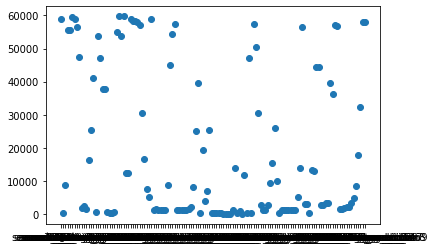

In [22]:
plt.scatter(range(len(zero_dist_train)), list(zero_dist_train.values()))
plt.xticks(range(len(zero_dist_train)), list(zero_dist_train.keys()))
plt.show()

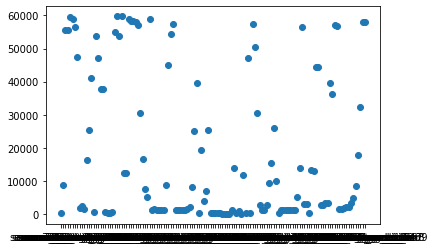

In [23]:
plt.scatter(range(len(zero_dist_test)), list(zero_dist_test.values()))
plt.xticks(range(len(zero_dist_test)), list(zero_dist_test.keys()))
plt.show()

In [24]:
# the number of rows and columns before dropping the nans:
print("TRAIN: ", "rows: ", len(df_train), "cols: ", len(df_train.columns))
print("TEST: ", "rows: ", len(df_test), "cols: ", len(df_test.columns))

TRAIN:  rows:  60000 cols:  133
TEST:  rows:  16001 cols:  132


In [25]:
# # dropping the columns with more than 50 percent zeros:
# extra_zero_train = [i for i in zero_dist_train if (zero_dist_train[i] < 0.9 * len(df_train)) or i == 'target' or i == 'id']
# extra_zero_test = [i for i in zero_dist_test if (zero_dist_test[i] < 0.9 * len(df_test)) or i == 'id']

# extra_zero_train.append('id')
# extra_zero_test.append('id')

# df_train = df_train[extra_zero_train]
# df_test = df_test[extra_zero_test]

In [26]:
# the number of rows and columns before dropping the nans:
print("TRAIN: ", "rows: ", len(df_train), "cols: ", len(df_train.columns))
print("TEST: ", "rows: ", len(df_test), "cols: ", len(df_test.columns))

TRAIN:  rows:  60000 cols:  133
TEST:  rows:  16001 cols:  132


# Sampling

In [27]:
# 30
zero_index = np.array([i for i in df_train[df_train.target == 0].index])
zero_index = np.random.choice(zero_index, int(0.10 * len(zero_index)), replace = False)
df_train = pd.concat([df_train[df_train.target == 1], df_train.loc[zero_index]])

In [28]:
df_train.target.value_counts()

0.0    5900
1.0    1000
Name: target, dtype: int64

In [29]:
d = {}

df_train_1 = df_train[df_train.target == 1]

for i in df_train_1.columns:
    if (i != 'target') or (i != 'id'):
        mu = df_train_1[i].mean()
        std = df_train_1[i].std()
        
        signal = np.random.normal(mu, std, 4000)
        
        d[i] = signal

new_df = pd.concat([df_train, pd.DataFrame(d)])    

In [30]:
new_df.target.value_counts()

0.0    5900
1.0    5000
Name: target, dtype: int64

# Corr

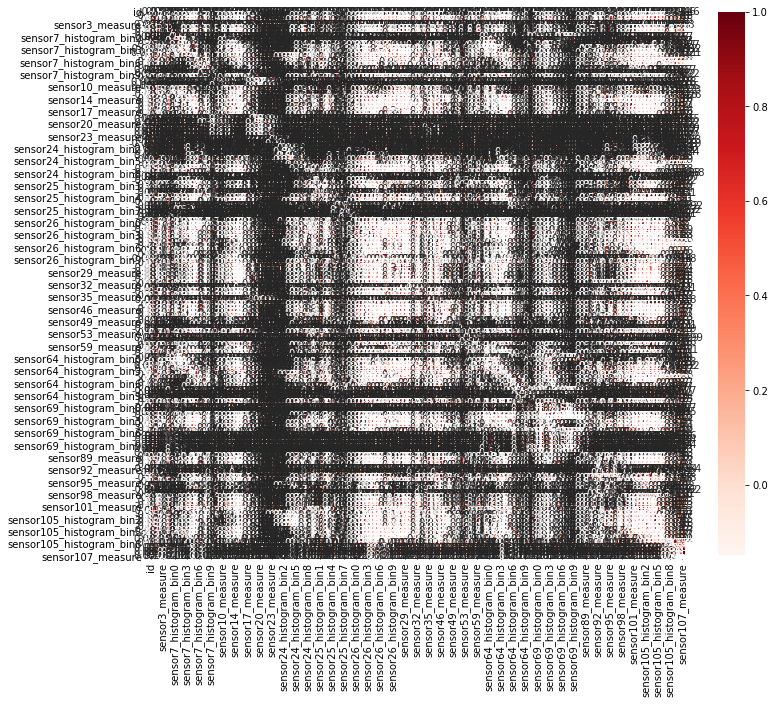

In [31]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [32]:
df_train_0 = new_df[new_df.target == 0]
new_df = new_df[new_df.target == 1]
new_df = pd.concat([new_df, df_train_0.groupby(df_train_0.index // 10).mean()])

In [33]:
# #Correlation with output variable
# cor_target = abs(cor["target"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.4]
# col_list = relevant_features.index.tolist()
# col_list.append('id')
# df_train=df_train[col_list]

# Adding some new features

In [34]:
# # # sensor61_measure, sensor17_measure, sensor35_measure
# df_train['sensor35_measure_2'] = df_train.sensor35_measure * df_train.sensor17_measure
# df_train['sensor35_measure_3'] = df_train.sensor35_measure * df_train.sensor35_measure
# df_train['sensor35_measure_4'] = df_train.sensor17_measure * df_train.sensor61_measure
# df_train['sensor35_measure_5'] = df_train.sensor1_measure * df_train.sensor1_measure
# df_train['sensor35_measure_6'] = df_train.sensor17_measure * df_train.sensor17_measure

# df_train['sensor35_measure_5'] = df_train.sensor1_measure * df_train.sensor1_measure
# df_train['sensor35_measure_6'] = df_train.sensor1_measure * df_train.sensor35_measure
# df_train['sensor35_measure_7'] = df_train.sensor16_measure * df_train.sensor35_measure

# df_train['sensor17_measure_2'] = df_train.sensor17_measure * df_train.sensor61_measure
# df_train['sensor35_measure_2'] = df_train.sensor35_measure * df_train.sensor17_measure

In [35]:
# # Create correlation matrix
# corr_matrix = df_train.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find index of feature columns with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# df_train.drop(df_train[to_drop], axis=1, inplace=True)

In [36]:
# the number of rows and columns before dropping the nans:
print("TRAIN: ", "rows: ", len(df_train), "cols: ", len(df_train.columns))
print("TEST: ", "rows: ", len(df_test), "cols: ", len(df_test.columns))

TRAIN:  rows:  6900 cols:  133
TEST:  rows:  16001 cols:  132


# Train set

In [37]:
# train set
y_train = df_train['target']
ids_train = df_train['id']

df_train.drop('id', axis=1, inplace=True)
df_train.drop('target', axis=1, inplace=True)

# print(df_train.head())

X_train = df_train.values

# test set
ids_test = df_test['id']
# print(df_test.head())
df_test.drop('id', axis=1, inplace=True)

X_test = df_test.values

# Scaling

In [38]:
# Scaler models:
# scaler_model = StandardScaler()
scaler_model = MinMaxScaler()

In [39]:
inter = [i for i in df_train.columns if i in df_test.columns]
df_train = df_train[inter]
df_test = df_test[inter]
len(df_test.columns)

131

In [40]:
X_train_internal, X_test_internal, y_train_interal, y_test_interal = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [41]:
scaler_model.fit(X_train_internal)

X_train_internal = scaler_model.transform(X_train_internal)
X_test_internal = scaler_model.transform(X_test_internal)
X_test = scaler_model.transform(X_test)

# feature_importances = pd.DataFrame(ad_hocModel.feature_importances_, index = df_train.columns, columns=['importance']).sort_values('importance', ascending=False)
# cols_to_train = feature_importances[:10].index.tolist()

In [42]:
# ADHOC RF
from sklearn.ensemble import AdaBoostClassifier
ad_hocModel_2 = AdaBoostClassifier()
ad_hocModel_2.fit(X_train_internal, y_train_interal)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Normalized confusion matrix
[[0.97631134 0.02368866]
 [0.15151515 0.84848485]]


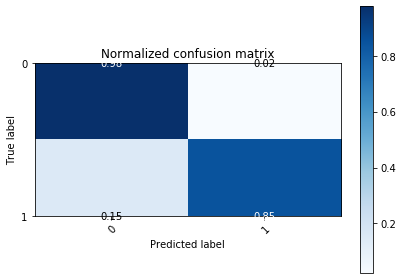

In [43]:

y_adhoc_pred = ad_hocModel_2.predict(X_test_internal)

ADA_F1 = f1_score(y_pred=y_adhoc_pred, y_true=y_test_interal, average='binary')

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(y_test_interal, y_adhoc_pred, normalize=True,
                      title='Normalized confusion matrix')


y_pred_test = ad_hocModel_2.predict(X_test)
df_out = pd.DataFrame({'id': ids_test, 'target': y_pred_test}, dtype=int)
df_out.to_csv('out.csv', index=None)

In [44]:
# ADHOC RF
ad_hocModel = RandomForestClassifier(max_depth=10, random_state=0)
ad_hocModel.fit(X_train_internal, y_train_interal)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Normalized confusion matrix
[[0.97800338 0.02199662]
 [0.12121212 0.87878788]]


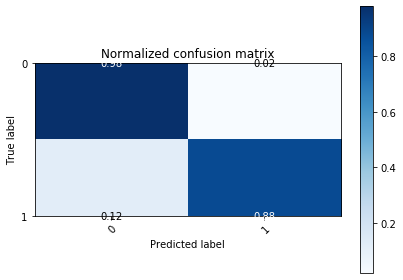

In [45]:

y_adhoc_pred = ad_hocModel.predict(X_test_internal)

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(y_test_interal, y_adhoc_pred, normalize=True,
                      title='Normalized confusion matrix')


y_pred_test = ad_hocModel.predict(X_test)
df_out = pd.DataFrame({'id': ids_test, 'target': y_pred_test}, dtype=int)
df_out.to_csv('out.csv', index=None)

In [46]:
import pandas as pd
feature_importances = pd.DataFrame(ad_hocModel.feature_importances_,
                                   index = df_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances[:10]

importance
sensor59_measure            0.145864
sensor67_measure            0.089116
sensor35_measure            0.073933
sensor1_measure             0.066597
sensor32_measure            0.065593
sensor45_measure            0.065001
sensor15_measure            0.064082
sensor26_histogram_bin4     0.052723
sensor105_histogram_bin5    0.048267
sensor17_measure            0.021534

In [47]:
# plt.scatter(df_train.sensor61_measure, df_train.sensor1_measure, c=y_train_interal)

## PCA

In [48]:
pca_train_internal = PCA(n_components=2).fit(X_train_internal)
pca_test_internal = PCA(n_components=2).fit(X_test_internal)
pca_test = PCA(n_components=2).fit(X_test)

X_train_internal_pca = pca_train_internal.transform(X_train_internal)
X_test_internal_pca = pca_test_internal.transform(X_test_internal)
X_test_pca = pca_test.transform(X_test)

In [49]:
pca_test.explained_variance_ratio_

array([0.99519258, 0.00179832])

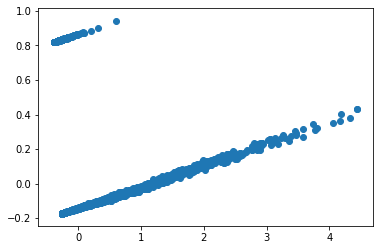

In [50]:
plt.scatter(X_train_internal_pca[:, 0], X_train_internal_pca[:, 1])

# Model

In [51]:
# model = RandomForestClassifier(max_depth=4)
model = RandomForestClassifier(max_depth=8)
model.fit(X_train_internal_pca, y_train_interal)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred_train_interal = model.predict(X_train_internal_pca)
y_pred_test_interal = model.predict(X_test_internal_pca)

# Eval

In [53]:
f1_score(y_pred=y_pred_train_interal, y_true=y_train_interal, average='binary') 

0.9022715266772319

In [54]:
F1_RF = f1_score(y_pred=y_pred_test_interal, y_true=y_test_interal, average='binary') 
F1_RF

0.8018018018018018

In [55]:
accuracy_score(y_pred=y_pred_train_interal, y_true=y_train_interal)

0.9702093397745571

In [56]:
accuracy_score(y_pred=y_pred_test_interal, y_true=y_test_interal)

0.936231884057971

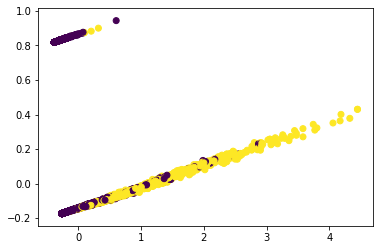

In [57]:
plt.scatter(X_train_internal_pca[:, 0], X_train_internal_pca[:, 1], c=y_train_interal)

Normalized confusion matrix
[[0.94247039 0.05752961]
 [0.1010101  0.8989899 ]]


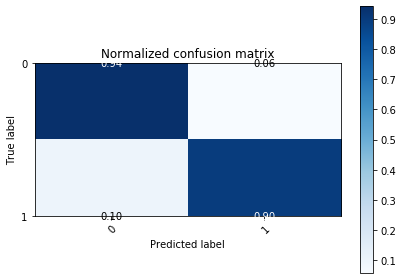

In [58]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(y_test_interal, y_pred_test_interal, normalize=True,
                      title='Normalized confusion matrix')


# Export

In [59]:
y_pred_test = model.predict(X_test_pca)

In [60]:
df_out = pd.DataFrame({'id': ids_test, 'target': y_pred_test}, dtype=int)
df_out.to_csv('out.csv', index=None)

In [61]:
(y_pred_test == 1).sum()

188

In [62]:
y_pred_test_prob = model.predict_proba(X_test_pca)

In [63]:
y_pred_test_prob

array([[0.6       , 0.4       ],
       [0.6       , 0.4       ],
       [0.78069767, 0.21930233],
       ...,
       [0.6       , 0.4       ],
       [0.6       , 0.4       ],
       [0.6       , 0.4       ]])

In [64]:
import pickle
filename = "RF_model.pkl"
pickle.dump(model, open(filename, "wb"))

In [65]:
np.savetxt("test.csv", X_test_pca, delimiter=",")

# Another Model

In [66]:
# model = RandomForestClassifier(max_depth=4)
model = MLPClassifier(alpha=0.5)
model.fit(X_train_internal_pca, y_train_interal)

MLPClassifier(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [67]:
y_pred_train_interal = model.predict(X_train_internal_pca)
y_pred_test_interal = model.predict(X_test_internal_pca)

In [68]:
f1_score(y_pred=y_pred_train_interal, y_true=y_train_interal, average='binary') 

0.813578826237054

In [69]:
F1_NN = f1_score(y_pred=y_pred_test_interal, y_true=y_test_interal, average='binary') 
F1_NN

0.7897435897435898

In [70]:
accuracy_score(y_pred=y_pred_train_interal, y_true=y_train_interal)

0.9478260869565217

In [71]:
accuracy_score(y_pred=y_pred_test_interal, y_true=y_test_interal)

0.9405797101449276

In [72]:
y_pred_test = model.predict(X_test_pca)

In [73]:
df_out = pd.DataFrame({'id': ids_test, 'target': y_pred_test}, dtype=int)
df_out.to_csv('out.csv', index=None)

In [74]:
(y_pred_test == 1).sum()

103

Normalized confusion matrix
[[0.9678511  0.0321489 ]
 [0.22222222 0.77777778]]


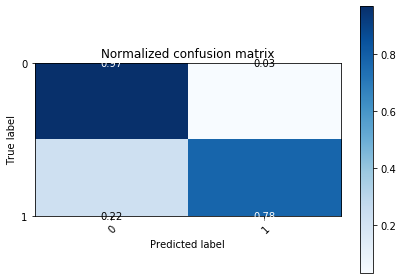

In [75]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(y_test_interal, y_pred_test_interal, normalize=True,
                      title='Normalized confusion matrix')


Normalized confusion matrix
[[0.96954315 0.03045685]
 [0.22222222 0.77777778]]


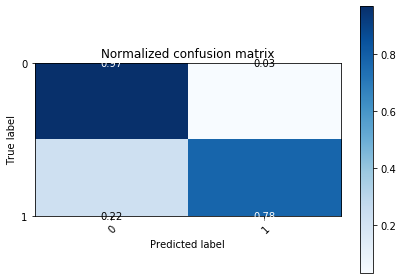

In [76]:
from sklearn.naive_bayes import GaussianNB

# model = RandomForestClassifier(max_depth=4)
model = GaussianNB()
model.fit(X_train_internal_pca, y_train_interal)

y_pred_train_interal = model.predict(X_train_internal_pca)
y_pred_test_interal = model.predict(X_test_internal_pca)

F1_GNB = f1_score(y_pred=y_pred_test_interal, y_true=y_test_interal, average='binary') 
F1_GNB

y_pred_test = model.predict(X_test_pca)

df_out = pd.DataFrame({'id': ids_test, 'target': y_pred_test}, dtype=int)
df_out.to_csv('out.csv', index=None)

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(y_test_interal, y_pred_test_interal, normalize=True,
                      title='Normalized confusion matrix')


In [77]:
import joblib
RF = joblib.load("RF_model.pkl")

Normalized confusion matrix
[[0.95431472 0.04568528]
 [0.14141414 0.85858586]]


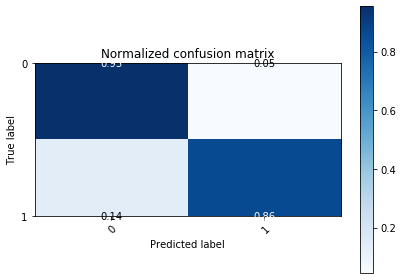

In [78]:
RF.fit(X_train_internal_pca, y_train_interal)
y_pred_train_interal = RF.predict(X_train_internal_pca)
y_pred_test_interal = RF.predict(X_test_internal_pca)

y_pred_test = RF.predict(X_test_pca)

df_out = pd.DataFrame({'id': ids_test, 'target': y_pred_test}, dtype=int)
df_out.to_csv('out.csv', index=None)

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(y_test_interal, y_pred_test_interal, normalize=True,
                      title='Normalized confusion matrix')


# Plotting Different Models:

Text(0.5, 1.0, 'F1 Score Comparison')

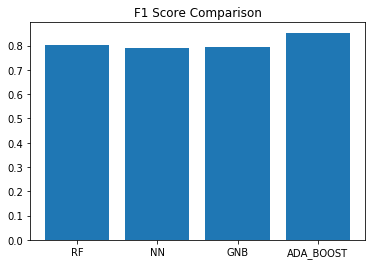

In [79]:
plot_help = list(zip(range(4), [F1_RF, F1_NN, F1_GNB, ADA_F1]))
plt.bar(['RF', 'NN', 'GNB', 'ADA_BOOST'], [F1_RF, F1_NN, F1_GNB, ADA_F1])
plt.title("F1 Score Comparison")